In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,GRU,LSTM,SimpleRNN
from tensorflow.keras.optimizers import Adam

## Data

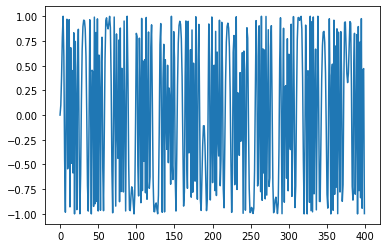

In [23]:
series = np.sin(0.1*np.arange(400)**2)
N = len(series)
plt.plot(series)
plt.show()

In [24]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
print(f'shape of X: {X.shape}, shape of Y: {Y.shape}')

shape of X: (390, 10), shape of Y: (390,)


## AutoRegressive Model

In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)
model.compile(optimizer=Adam(lr=0.01),
              loss='mse')

In [28]:
model.fit(X[:-N//2],Y[:-N//2],
          validation_data=(X[-N//2:],Y[-N//2:]),
          epochs=80)

Epoch 1/80
6/6 [==============================] - 0s 26ms/step - loss: 1.3272 - val_loss: 1.3607
Epoch 2/80
6/6 [==============================] - 0s 7ms/step - loss: 1.1542 - val_loss: 1.1836
Epoch 3/80
6/6 [==============================] - 0s 7ms/step - loss: 1.0145 - val_loss: 1.0305
Epoch 4/80
6/6 [==============================] - 0s 7ms/step - loss: 0.8963 - val_loss: 0.9027
Epoch 5/80
6/6 [==============================] - 0s 7ms/step - loss: 0.7975 - val_loss: 0.8057
Epoch 6/80
6/6 [==============================] - 0s 8ms/step - loss: 0.7164 - val_loss: 0.7289
Epoch 7/80
6/6 [==============================] - 0s 7ms/step - loss: 0.6640 - val_loss: 0.6675
Epoch 8/80
6/6 [==============================] - 0s 7ms/step - loss: 0.6184 - val_loss: 0.6245
Epoch 9/80
6/6 [==============================] - 0s 7ms/step - loss: 0.5843 - val_loss: 0.5949
Epoch 10/80
6/6 [==============================] - 0s 9ms/step - loss: 0.5624 - val_loss: 0.5743
Epoch 11/80
6/6 [=====================

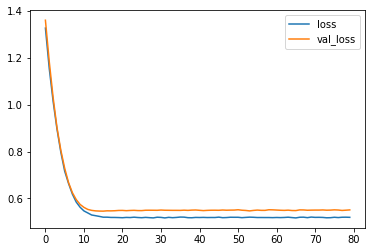

In [29]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Forecasting

In [0]:
validation_data = Y[-N//2:]
validation_pred = []
last_x = X[-N//2]

while len(validation_pred) < len(validation_data):
  pred = model.predict(last_x.reshape(1,-1))[0,0]
  validation_pred.append(pred)
  last_x = np.roll(last_x,-1)
  last_x[-1] = pred

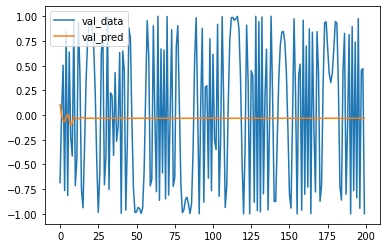

In [33]:
plt.plot(validation_data,label='val_data')
plt.plot(validation_pred,label='val_pred')
plt.legend()
plt.show()

## Simple RNN Model

In [0]:
X = X.reshape(-1,T,1)

i = Input(shape=(T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(loss='mse',
              optimizer=Adam(lr=0.05))

In [36]:
model.fit(X[:-N//2],Y[:-N//2],
          validation_data=(X[-N//2:],Y[-N//2:]),
          batch_size=32,epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 28ms/step - loss: 0.6571 - val_loss: 0.6506
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 0.5328 - val_loss: 0.5016
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.5358 - val_loss: 0.5196
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 0.4834 - val_loss: 0.4758
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.4504 - val_loss: 0.4992
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.4420 - val_loss: 0.4092
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3667 - val_loss: 0.3251
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3058 - val_loss: 0.2425
Epoch 9/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2260 - val_loss: 0.1753
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1520 - val_loss: 0.1350
Epoch 11/200
6/6 [==========

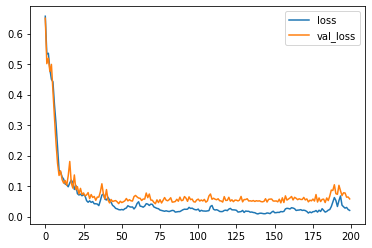

In [37]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Forecasting

In [0]:
validation_data = Y[-N//2:]
validation_pred = []
last_x = X[-N//2]

while len(validation_pred) < len(validation_data):
  pred = model.predict(last_x.reshape(1,-1))[0,0]
  validation_pred.append(pred)
  last_x = np.roll(last_x,-1)
  last_x[-1] = pred

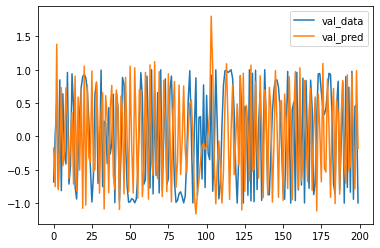

In [39]:
plt.plot(validation_data,label='val_data')
plt.plot(validation_pred,label='val_pred')
plt.legend()
plt.show()

## LSTM

In [0]:
X = X.reshape(-1,T,1)

i = Input(shape=(T,D))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(loss='mse',
              optimizer=Adam(lr=0.05))

In [41]:
model.fit(X[:-N//2],Y[:-N//2],
          validation_data=(X[-N//2:],Y[-N//2:]),
          batch_size=32,epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 67ms/step - loss: 0.5366 - val_loss: 0.5607
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 0.5568 - val_loss: 0.5488
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 0.5221 - val_loss: 0.5515
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 0.5266 - val_loss: 0.5456
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.5185 - val_loss: 0.5433
Epoch 6/200
6/6 [==============================] - 0s 11ms/step - loss: 0.5148 - val_loss: 0.5399
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.4999 - val_loss: 0.5178
Epoch 8/200
6/6 [==============================] - 0s 11ms/step - loss: 0.4715 - val_loss: 0.4647
Epoch 9/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4018 - val_loss: 0.3811
Epoch 10/200
6/6 [==============================] - 0s 11ms/step - loss: 0.3018 - val_loss: 0.2900
Epoch 11/200
6/6 [=

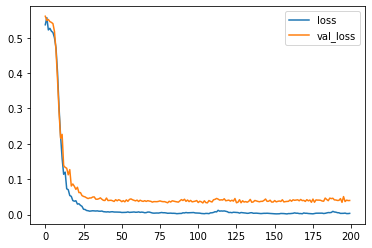

In [42]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Forecasting

In [0]:
validation_data = Y[-N//2:]
validation_pred = []
last_x = X[-N//2]

while len(validation_pred) < len(validation_data):
  pred = model.predict(last_x.reshape(1,-1))[0,0]
  validation_pred.append(pred)
  last_x = np.roll(last_x,-1)
  last_x[-1] = pred

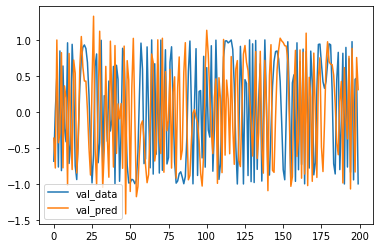

In [44]:
plt.plot(validation_data,label='val_data')
plt.plot(validation_pred,label='val_pred')
plt.legend()
plt.show()